# EDA

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# Read data
df = pd.read_csv("yelp_reviews.csv")
# Drop irrelevant columns
cols_to_drop = ['compliment_hot', 'compliment_more',
       'compliment_profile', 'compliment_cute', 'compliment_list',
       'compliment_note', 'compliment_plain', 'compliment_cool',
       'compliment_funny', 'compliment_writer', 'compliment_photos']
df = df.drop(columns=cols_to_drop)

In [21]:
# Add columns
df['text_length'] = df['text'].apply(lambda x: len(x))

# Drop rows with null categories
df = df[df['categories'].notna()]

# Change into list form
df['categories'] = df['categories'].apply(lambda x: sorted(x.split(", ")))

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499859 entries, 0 to 499999
Data columns (total 33 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   review_id       499859 non-null  object 
 1   user_id         499859 non-null  object 
 2   business_id     499859 non-null  object 
 3   stars_x         499859 non-null  float64
 4   useful_x        499859 non-null  int64  
 5   funny_x         499859 non-null  int64  
 6   cool_x          499859 non-null  int64  
 7   text            499859 non-null  object 
 8   date            499859 non-null  object 
 9   name_x          499858 non-null  object 
 10  review_count_x  499859 non-null  int64  
 11  yelping_since   499859 non-null  object 
 12  useful_y        499859 non-null  int64  
 13  funny_y         499859 non-null  int64  
 14  cool_y          499859 non-null  int64  
 15  elite           109935 non-null  object 
 16  friends         499859 non-null  object 
 17  fans      

In [95]:
df[['stars_x','text_length']].describe()

,stars_x,text_length
count,499859.000000,499859.000000
mean,3.706081,592.442675
std,1.489402,560.603877
min,1.000000,1.000000
25%,3.000000,234.000000
50%,4.000000,418.000000
75%,5.000000,751.000000
max,5.000000,5047.000000


Text(0.5, 1.0, 'Ratings Distribution')

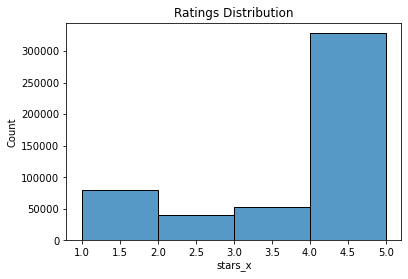

In [26]:
sns.histplot(data=df, x="stars_x", bins = 4).set_title("Ratings Distribution")

In [36]:
stars

,stars_x,useful_x,funny_x,cool_x,review_count_x,useful_y,funny_y,cool_y,fans,average_stars,latitude,longitude,stars_y,review_count_y,is_open,text_length
0,1.0,1.913081,0.546228,0.210473,42.469879,96.643981,42.839875,51.416900,2.808689,2.788763,36.804905,-103.933276,3.014340,300.687541,0.862269,748.502618
1,2.0,1.528670,0.586086,0.392159,131.426603,448.494150,222.718949,298.090923,12.309290,3.350358,37.502172,-101.412938,3.392437,452.310404,0.820358,750.843152
2,3.0,1.390634,0.597934,0.681973,247.661505,944.683247,462.983090,657.311426,26.061308,3.630931,37.995835,-100.057679,3.538786,512.950220,0.819482,700.905366
3,4.0,1.396525,0.567001,0.885915,213.561580,846.065964,421.734320,606.855542,23.641167,3.812567,37.919461,-100.198796,3.735504,530.187273,0.834964,616.262822
4,5.0,1.022031,0.326660,0.569031,79.664630,258.919750,126.208909,180.098123,8.184282,4.106788,36.669081,-104.689733,4.034885,447.708210,0.886051,472.333575


Text(0, 0.5, 'Average Text Length')

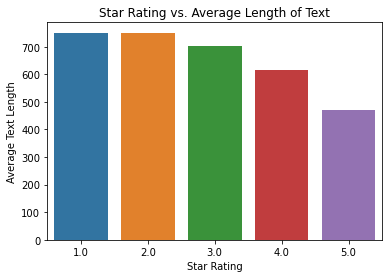

In [39]:
stars = df.groupby("stars_x", as_index = False).mean()
f = sns.barplot(data=stars, x="stars_x", y="text_length")
f.set_title("Star Rating vs. Average Length of Text")
f.set_xlabel("Star Rating")
f.set_ylabel("Average Text Length")

### Cities

Text(0, 0.5, 'City')

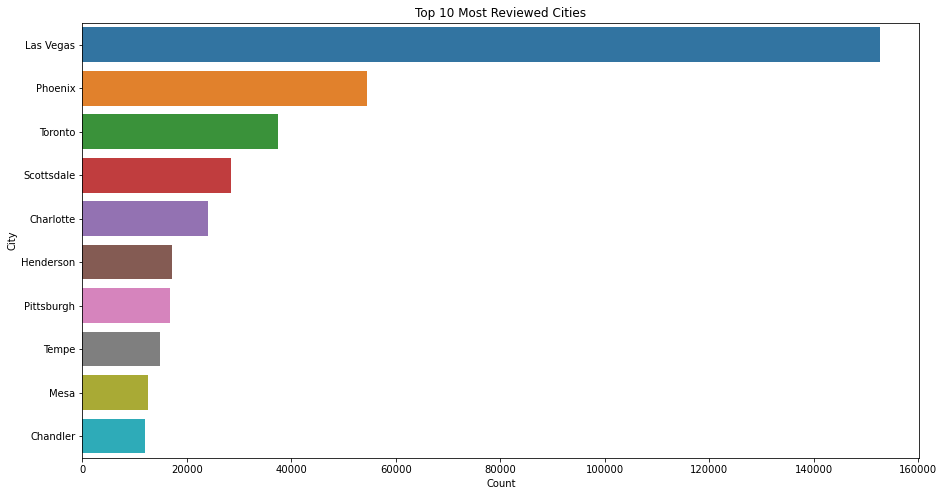

In [50]:
top10 = list(df['city'].value_counts()[:10].index)
cities = df[df['city'].isin(top10)]
city_counts = cities['city'].value_counts().to_frame().reset_index()
plt.figure(figsize = (15,8))
f = sns.barplot(data=city_counts, x='city', y='index')
f.set_title("Top 10 Most Reviewed Cities")
f.set_xlabel("Count")
f.set_ylabel("City")

Text(0, 0.5, 'City')

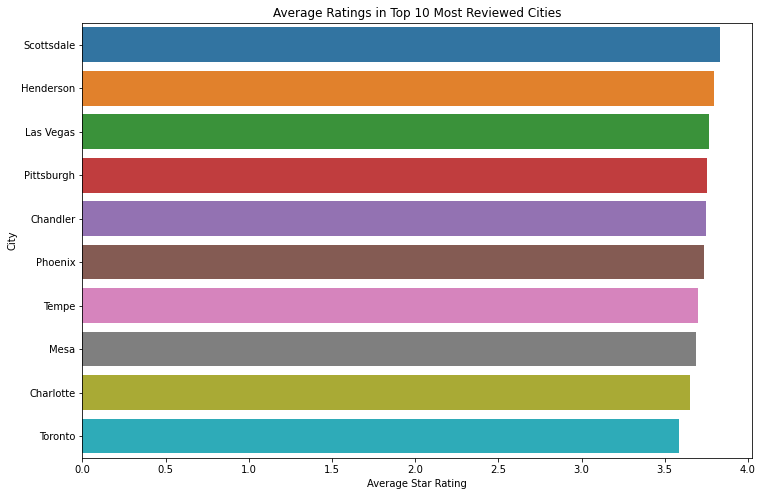

In [75]:
top10 = list(df['city'].value_counts()[:10].index)
cities = df[df['city'].isin(top10)].groupby("city", as_index=False).mean()
plt.figure(figsize = (12,8))
f = sns.barplot(data=cities, y="city", x="stars_x", order=cities.sort_values('stars_x',ascending = False).city)
f.set_title("Average Ratings in Top 10 Most Reviewed Cities")
f.set_xlabel("Average Star Rating")
f.set_ylabel("City")

### Categories

In [24]:
import functools
import operator

lst = df['categories'].tolist()
cats_lst = functools.reduce(operator.iconcat, lst , [])
cats = pd.DataFrame(cats_lst, columns=['cats'])

Text(0, 0.5, 'Category')

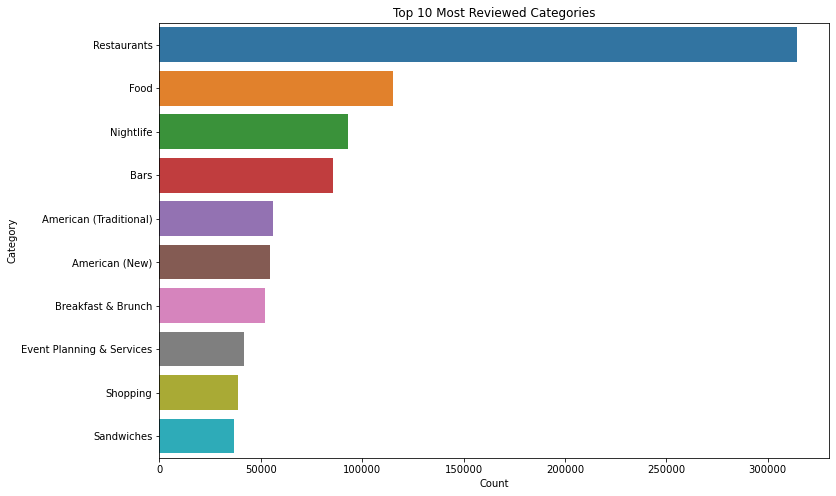

In [74]:
top10 = list(cats['cats'].value_counts()[:10].index)
filter_cats = cats[cats['cats'].isin(top10)]
cat_counts = filter_cats['cats'].value_counts().to_frame().reset_index()
plt.figure(figsize = (12,8))
f = sns.barplot(data=cat_counts, x='cats', y='index')
f.set_title("Top 10 Most Reviewed Categories")
f.set_xlabel("Count")
f.set_ylabel("Category")

In [69]:
def categorize(x):
    if 'Restaurants' in x:
        return 'Restaurants'
    elif 'Food' in x:
        return 'Food'
    elif 'Nightlife' in x:
        return 'Nightlife'
    elif 'Bars' in x:
        return 'Bars'
    elif 'American (Traditional)' in x:
        return 'Amercian (Traditional)'
    elif 'American (New)' in x:
        return 'American (New)'
    elif 'Breakfast & Brunch' in x:
        return 'Breakfast & Brunch'
    elif 'Event Planning & Services' in x:
        return 'Event Planning & Services'
    elif 'Shopping' in x:
        return 'Shopping'
    elif 'Sandwiches' in x:
        return 'Sandwiches'
    else:
        return 'Other'

df['simple_category'] = df['categories'].apply(lambda x: categorize(x))

Text(0, 0.5, 'Category')

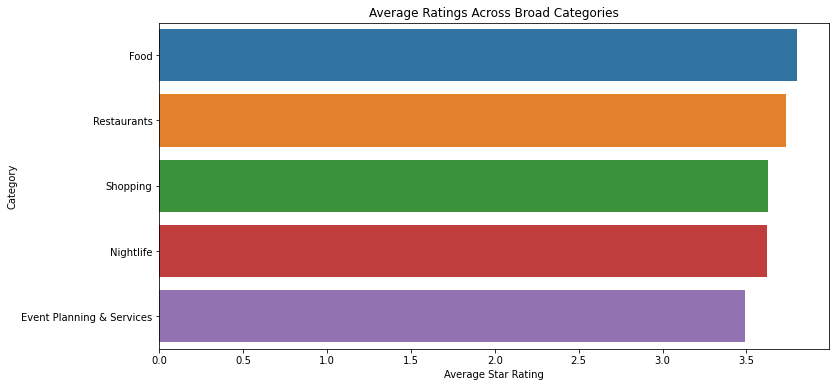

In [73]:
top10 = list(cats['cats'].value_counts()[:10].index)
cat_ratings = df[df['simple_category'].isin(top10)].groupby("simple_category", as_index=False).mean()
plt.figure(figsize = (12,6))
f = sns.barplot(data=cat_ratings, y="simple_category", x="stars_x", order=cat_ratings.sort_values('stars_x',ascending = False).simple_category)
f.set_title("Average Ratings Across Broad Categories")
f.set_xlabel("Average Star Rating")
f.set_ylabel("Category")

### Dates

In [87]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].apply(lambda x: x.month)
df['year'] = df['date'].apply(lambda x: x.year)

Text(0, 0.5, 'Average Rating')

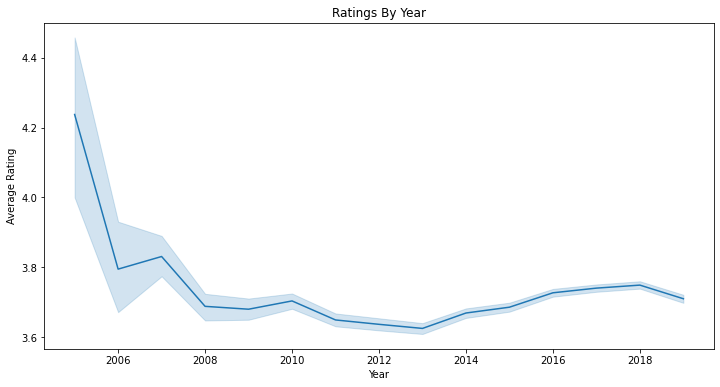

In [91]:
plt.figure(figsize = (12,6))
f = sns.lineplot(data=df, x="year", y="stars_x")
f.set_title("Ratings By Year")
f.set_xlabel("Year")
f.set_ylabel("Average Rating")

Text(0, 0.5, 'Average Rating')

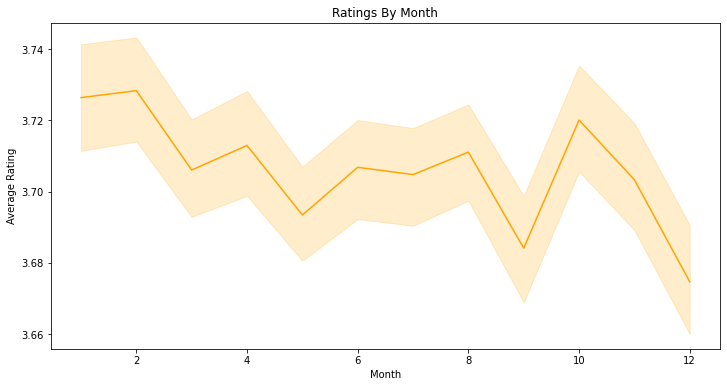

In [93]:
plt.figure(figsize = (12,6))
f = sns.lineplot(data=df, x="month", y="stars_x", color = "orange")
f.set_title("Ratings By Month")
f.set_xlabel("Month")
f.set_ylabel("Average Rating")

### Users

Exploration:
- attributes
- categories
- Date of review
- age of account